In [1]:
 
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# Importing the dataset
dataset = pd.read_csv(r'E:\28th,29th- Introduction to Deep Learning\28th,29th- Introduction to Deep Learning\Practicle - CPU\ANN_ 1st\Churn_Modelling.csv')


In [3]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]



In [4]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)



In [7]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [8]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [9]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)



In [10]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [11]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)



In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




In [14]:
X_train, X_test, y_train, y_test 

(      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 7389          667   34       5       0.00              2          1   
 9275          427   42       1   75681.52              1          1   
 2995          535   29       2  112367.34              1          1   
 5316          654   40       5  105683.63              1          1   
 356           850   57       8  126776.30              2          1   
 ...           ...  ...     ...        ...            ...        ...   
 9225          594   32       4  120074.97              2          1   
 4859          794   22       4  114440.24              1          1   
 3264          738   35       5  161274.05              2          1   
 9845          590   38       9       0.00              2          1   
 2732          623   48       1  108076.33              1          1   
 
       IsActiveMember  EstimatedSalary  Germany  Spain   Male  
 7389               0        163830.64    False   True  False  
 9275 

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




In [16]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential #Sequenctial will initialize the neural network
from keras.layers import Dense #dense will build the hidden layer
#from keras.layers import LeakyReLU,PReLU,ELU #
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()


In [19]:
# Adding the input layer and the first hidden layer

# classifier.add(Dense(output_dim = 11, init = 'he_uniform',activation='relu',input_dim = 11))
# 1st HL i will consider for 6 neurons, init - initiliazaton parameter, weights need to be initialise, 
#classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
#classifier.add(Dropout(0.3))
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [20]:
# Adding the second hidden layer
#classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 11, kernel_initializer = 'he_normal',activation='relu'))
#classifier.add(Dropout(0.4))



In [21]:
# Adding the third hidden layer

classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
#classifier.add(Dropout(0.2))

# Adding the output layer
#classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))




In [23]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10)
# reason why i take validation_split because test my data separately

# list all data in history

print(model_history.history.keys())





536/536 [==============================] - 2s 3ms/step - loss: 0.5123 - accuracy: 0.7962 - val_loss: 0.4885 - val_accuracy: 0.7955
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


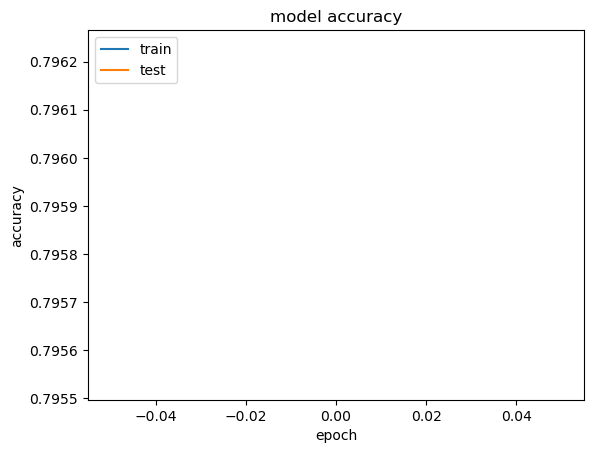

In [24]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


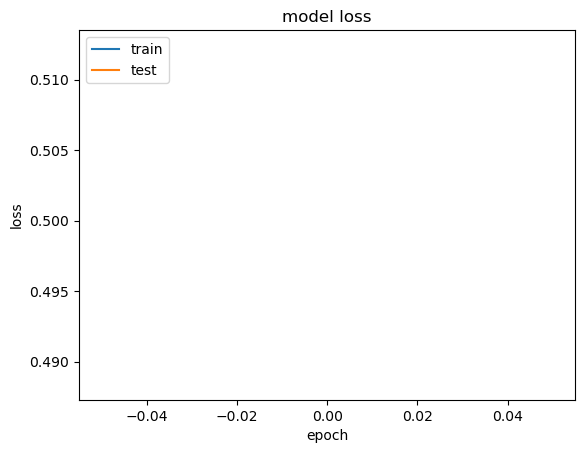

In [25]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [26]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 1ms/step


In [27]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[1595    0]
 [ 405    0]]


In [28]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

#**********************************************************************


0.7975
